In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [74]:
filepath = 'data.csv'
df = pd.read_csv(filepath)
df

,Year,Month,Southwest - Airtran,American,American - Eagle,Cape Air,Delta,Delta - ASA,Delta - Chautaqua,Delta - Comair,...,Saudi Arabian,Sierra Pacific,Sky King,Sun County,Swift Air,Team Jet,Titan Airways,USA Jet,World,World Atlantic
0,2010,Jan,242128,62414,7852,1287,75526,0,9168,2282,...,0,0,0,0,0,0,0,0,6390,0
1,2010,Feb,206609,47216,6467,1124,58297,0,6943,1454,...,0,0,0,0,0,0,0,0,1979,0
2,2010,Mar,294403,66157,8874,1602,124516,0,10953,2235,...,0,150,0,0,0,0,0,0,2786,0
3,2010,Apr,281366,65719,12701,1543,156400,0,10450,2327,...,0,0,0,0,0,0,0,0,3335,0
4,2010,May,309705,66768,13824,1468,157869,0,7557,2325,...,0,40,0,118,0,0,0,0,3609,0
5,2010,Jun,359810,67700,13766,1492,168970,0,2009,7440,...,0,60,0,0,0,0,0,0,3647,0
6,2010,Jul,383786,70454,14623,1562,169590,0,49,13551,...,0,0,0,0,0,0,0,0,3135,0
7,2010,Aug,364105,70081,15185,1583,168638,0,1182,11131,...,0,0,0,0,0,110,0,0,2842,0
8,2010,Sep,253851,59575,13513,1515,154986,130,3814,9754,...,0,0,0,0,0,0,0,0,4143,0
9,2010,Oct,298463,68237,15022,1816,176014,530,4928,11463,...,0,0,260,0,0,0,0,0,5369,0


In [75]:
# Mapping months and creating new column
month_mapping = {
    "Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6,
    "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12
}
df["Month_Num"] = df["Month"].map(month_mapping)
df["Date"] = pd.to_datetime(df["Year"].astype(str) + "-" + df["Month_Num"].astype(str), format="%Y-%m")

df = df.set_index("Date")

airline_cols = df.columns[2:]
df_airlines = df[airline_cols]

df_airlines

,Southwest - Airtran,American,American - Eagle,Cape Air,Delta,Delta - ASA,Delta - Chautaqua,Delta - Comair,Delta - Compass,Delta - Freedom,...,Sierra Pacific,Sky King,Sun County,Swift Air,Team Jet,Titan Airways,USA Jet,World,World Atlantic,Month_Num
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,242128,62414,7852,1287,75526,0,9168,2282,0,653,...,0,0,0,0,0,0,0,6390,0,1
2010-02-01,206609,47216,6467,1124,58297,0,6943,1454,0,0,...,0,0,0,0,0,0,0,1979,0,2
2010-03-01,294403,66157,8874,1602,124516,0,10953,2235,0,0,...,150,0,0,0,0,0,0,2786,0,3
2010-04-01,281366,65719,12701,1543,156400,0,10450,2327,0,100,...,0,0,0,0,0,0,0,3335,0,4
2010-05-01,309705,66768,13824,1468,157869,0,7557,2325,0,1765,...,40,0,118,0,0,0,0,3609,0,5
2010-06-01,359810,67700,13766,1492,168970,0,2009,7440,0,1822,...,60,0,0,0,0,0,0,3647,0,6
2010-07-01,383786,70454,14623,1562,169590,0,49,13551,0,0,...,0,0,0,0,0,0,0,3135,0,7
2010-08-01,364105,70081,15185,1583,168638,0,1182,11131,0,835,...,0,0,0,0,110,0,0,2842,0,8
2010-09-01,253851,59575,13513,1515,154986,130,3814,9754,0,0,...,0,0,0,0,0,0,0,4143,0,9


In [76]:
# Which airline had the most growth over time 
total_passengers = df_airlines.sum()
top_growth_airline = total_passengers.idxmax()

print(f"The airline with the most growth over time is: {top_growth_airline} Airlines with {int(total_passengers[top_growth_airline])} passengers.")

The airline with the most growth over time is: Southwest Airlines with 45062224 passengers.


In [77]:
# Sorted by total passengers
df_airlines = df_airlines[total_passengers.sort_values(ascending=False).index]
df_airlines

,Southwest,Southwest - Airtran,Delta,US Airways,United,American,United - Continental,Jetblue,American - Eagle,British Airways,...,Month_Num,Delta - Gojet,Lan Airlines,Republic,Capital Airlines,Titan Airways,Aero Mexico,Northwest - Pinnacle,Midwest Connect - Skyway,Midwest Airlines
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-01,789954,242128,75526,70371,76024,62414,28985,13739,7852,7577,...,1,0,0,0,0,0,0,0,0,0
2010-02-01,586606,206609,58297,58133,63462,47216,22239,10961,6467,5059,...,2,0,0,0,0,0,0,0,0,0
2010-03-01,973477,294403,124516,82619,100374,66157,28675,20653,8874,6672,...,3,0,0,0,0,0,0,0,0,0
2010-04-01,990728,281366,156400,84229,101070,65719,26816,21871,12701,7098,...,4,0,0,0,0,0,0,0,0,0
2010-05-01,1041684,309705,157869,86129,103734,66768,36617,23487,13824,5972,...,5,0,0,0,0,0,0,0,0,0
2010-06-01,1111896,359810,168970,95799,105441,67700,38960,22617,13766,7518,...,6,0,0,0,0,0,0,0,0,0
2010-07-01,1171494,383786,169590,95531,105497,70454,38756,21553,14623,10821,...,7,0,0,0,0,0,0,0,0,0
2010-08-01,1128231,364105,168638,96412,105244,70081,36976,23677,15185,11250,...,8,0,0,0,0,0,0,0,0,0
2010-09-01,936313,253851,154986,88287,94270,59575,26202,19589,13513,9886,...,9,0,0,0,0,0,0,0,0,0


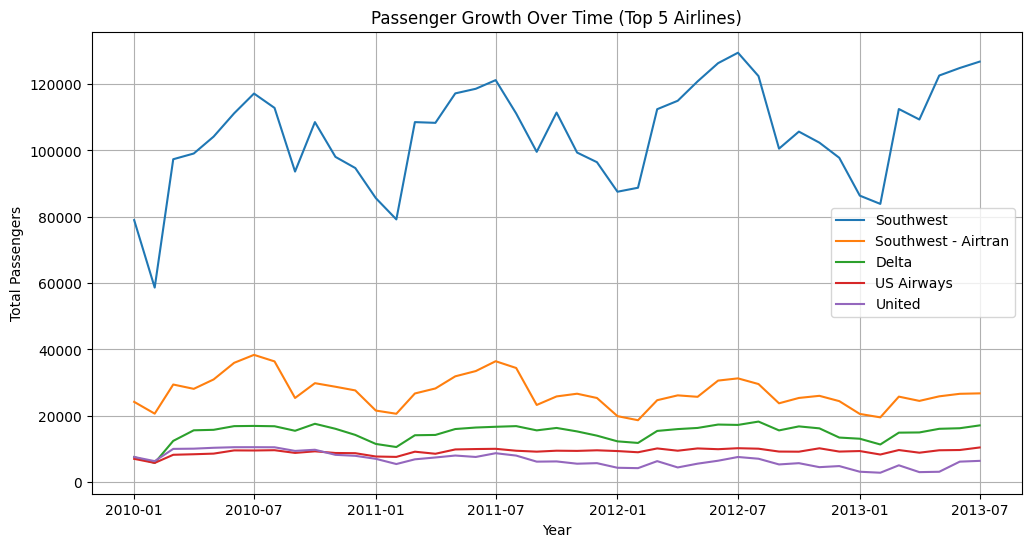

In [78]:
# Graphing growth of southwest compared to top 5 airlines (Passenger growth)
plt.figure(figsize=(12, 6))
for airline in df_airlines.columns[:5]:
    # plot with y axis relative to thousands
    plt.plot(df_airlines.index, df_airlines[airline]/10, label=airline)

plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Passenger Growth Over Time (Top 5 Airlines)")
plt.legend()
plt.grid(True)
plt.show()


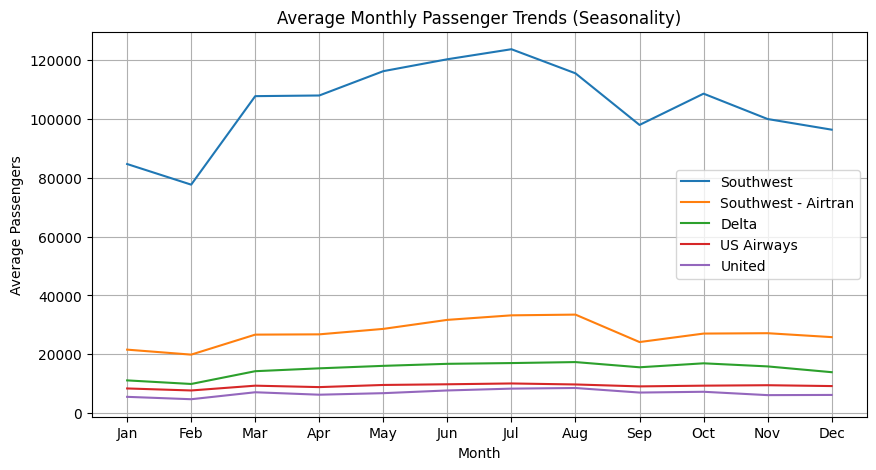

In [79]:
# Question 2: Are there any seasonal trends in passenger travel?
df_monthly_avg = df_airlines.groupby(df.index.month).mean()
plt.figure(figsize=(10, 5))
for airline in df_airlines.columns[:5]:  # Plot top 5 airlines for comparison
    plt.plot(df_monthly_avg.index, df_monthly_avg[airline]/10, label=airline)

# X axis labels
month_names = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
plt.xticks(ticks=range(1, 13), labels=month_names)

plt.xlabel("Month")
plt.ylabel("Average Passengers")
plt.title("Average Monthly Passenger Trends (Seasonality)")
plt.legend()
plt.grid(True)
plt.show()

In [85]:
# Question 3: What were the busiest and least busy months?
df_airlines["Total_Passengers"] = df_airlines.sum(axis=1)
df_airlines["Average_Passengers"] = df_airlines["Total_Passengers"] / len(df_airlines.columns[:-1])

# Print all months sorted by average passengers (greatest to least)
sorted_months = df_airlines[["Average_Passengers"]].reset_index()
sorted_months["Year"] = sorted_months["Date"].dt.year
sorted_months["Month"] = sorted_months["Date"].dt.month
sorted_months = sorted_months.sort_values(by="Average_Passengers", ascending=False)[["Year", "Month", "Average_Passengers"]]
#sorted_months = sorted_months.astype(int)
print("top 10 months + year sorted by average passengers:")
print(sorted_months.head(10).to_string(index=False))



top 10 months + year sorted by average passengers:
 Year  Month  Average_Passengers
 2012      7       178506.098232
 2011      7       177116.184364
 2012      6       175840.008247
 2010      7       174343.585723
 2013      7       173931.768317
 2012      8       171964.008844
 2011      6       170830.085238
 2013      6       170374.491650
 2010      8       169332.136572
 2010      6       167498.035021


/var/folders/1s/v19gklb15vz_l0kxvyt95m640000gn/T/ipykernel_3936/1220904300.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airlines["Total_Passengers"] = df_airlines.sum(axis=1)
/var/folders/1s/v19gklb15vz_l0kxvyt95m640000gn/T/ipykernel_3936/1220904300.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_airlines["Average_Passengers"] = df_airlines["Total_Passengers"] / len(df_airlines.columns[:-1])


The airline with the most decline over the years is: Delta - Northwest


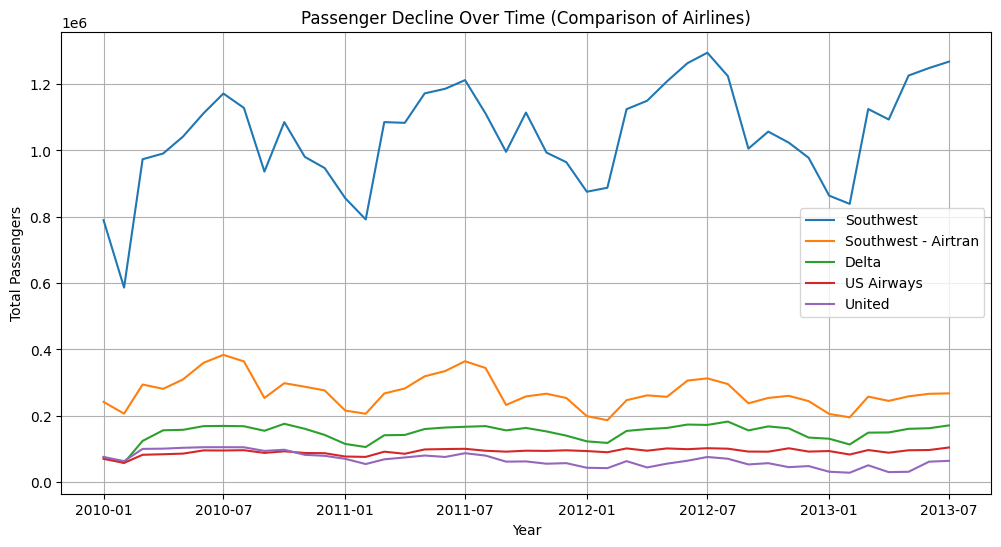

In [86]:
# Question 4: Did any airline experience a decline over the years?
declining_airline = (df_airlines.iloc[-1] - df_airlines.iloc[0]).idxmin()
print(f"The airline with the most decline over the years is: {declining_airline}")

# Plot the decline of the airline with other airlines for comparison
plt.figure(figsize=(12, 6))
for airline in df_airlines.columns[:5]:  # Plot top 5 airlines for comparison
    plt.plot(df_airlines.index, df_airlines[airline], label=airline)
plt.xlabel("Year")
plt.ylabel("Total Passengers")
plt.title("Passenger Decline Over Time (Comparison of Airlines)")
plt.legend()
plt.grid(True)
plt.show()